# Exploratory Data Analytics on Netflix Data

## Table of Contents

1.UNDERSTANDING OF DATA

2.PROFILING

3.PERFORMING EDA

4.ASK AND ANSWER QUESTIONS

5.CONCLUSION

# Questions Ask
1. What different types of show or movie are uploaded on Netflix?
2. No of movie and TV Shows relasied by month and year
3. Tend of movie and TV show relase by month and year
4. Count of Movie and TV Show by rating 
5. Top 10 movie and Tv Show by duration
6. Distribution Movie duration and TV Show Seasons
7. Count of Movie and TV Shows types of Movie and Tv Show
8. Show the count Movie and TV Shows relased in country
9. Show the count rating of Movie and TV shows by country 
10. Show the top 50 actor which has casted in movie and TV show 


In [2]:
#importing modules.

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#importing data from csv file.
data=pd.read_csv("8. Netflix Dataset.csv")#reading csv file.
data2=data

In [4]:
data.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [5]:
data.tail(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


## Pandas Profiling

In [6]:
#pandas profiling.
from pandas_profiling import ProfileReport
prof=ProfileReport(data)
prof.to_file(output_file='output.html')

ModuleNotFoundError: No module named 'pandas_profiling'

## Link of Profile Report

https://hub.binder.jovian.com/user/ayushraj21042002/api-git-c4f6962-50dda9b7323_277-uldotdqa/view/output.html
    link to pandas profiling.

## Data Preparation and Cleaning
1.Load the file using Pandas

2.Look at some information about the data & the columns

3.Fix any missing or incorrect values

In [7]:
data.isnull().sum() #null value in data set.

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [8]:
data.shape #total no of rows in each colum.

(7789, 11)

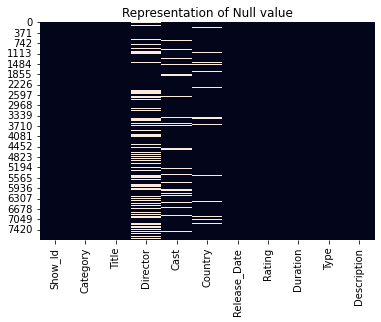

In [9]:
sns.heatmap(data.isnull(), cbar=False);
plt.title("Representation of Null value");

## PERCENTAGE OF NULL VALUE

In [10]:
data.isnull().sum()*(100/7789)#percentage of data empty in each column.

Show_Id          0.000000
Category         0.000000
Title            0.000000
Director        30.658621
Cast             9.218128
Country          6.509180
Release_Date     0.128386
Rating           0.089870
Duration         0.000000
Type             0.000000
Description      0.000000
dtype: float64

DATA SET IN WHICH THE COLUMN HAS MORE THAN 20 PERCENT OF NULL VALUE I USE TO DROP THAT COLUMN IF IT IS NOT MUCH IMPORTANT

IN DATA SET DIRECTOR COLUMN HAS 30 PERCENT OF NULL VALUE AND IN MY VIEW IT IS NOT MUCH IMPORT SO I AM DROPING IT.

In [11]:
data=data.drop(['Director'],axis=1)
data.head(5)
#here director column has been drop

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
a=data['Release_Date'].mode()[0]
data['Release_Date']=data['Release_Date'].fillna(a)#here  filling of  null value in release date with mode of date.

In [13]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])#here relase date has been converted from object to datetime format

In [14]:
data['Relase_year'] = data['Release_Date'].dt.year #here i splited Relase_Date into month and year.
data['Relase_month']=data['Release_Date'].dt.month_name()
data

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January
...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October
7785,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March
7786,s7785,Movie,Zulu Man in Japan,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September
7787,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October


filling NULL value in  rating column with mode value

In [15]:
a=data['Rating'].mode()[0]
data['Rating'] = data['Rating'].fillna(a)#here i fill reating value with mode.

In [16]:
data.isnull().sum() 

Show_Id           0
Category          0
Title             0
Cast            718
Country         507
Release_Date      0
Rating            0
Duration          0
Type              0
Description       0
Relase_year       0
Relase_month      0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Cast          7071 non-null   object        
 4   Country       7282 non-null   object        
 5   Release_Date  7789 non-null   datetime64[ns]
 6   Rating        7789 non-null   object        
 7   Duration      7789 non-null   object        
 8   Type          7789 non-null   object        
 9   Description   7789 non-null   object        
 10  Relase_year   7789 non-null   int64         
 11  Relase_month  7789 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.3+ KB


# Exploratory Analysis and Visualization

## Univariant and Multivariant analysing on columns
1.Category

2.Cast

3.Country

4.Release_Date(on basis of month and year)

5.Duration

6.Type

## 1.Analysis by Category column.

In [18]:
 data.head(2)

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December


## QUESTION ASK 1

## What different types of show or movie are uploaded on Netflix? 


In [19]:
print(data['Category'].unique())


['TV Show' 'Movie']


In [20]:
a=data['Category'].value_counts()
a
df = pd.DataFrame(a)
df 

,Category
Movie,5379
TV Show,2410


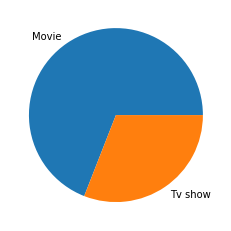

In [21]:
category=['Movie','Tv show']
count=[5379,2410]
plt.pie(count, labels=category);

# 2. Analysis by Month and year

In [22]:
a=data[['Category','Relase_year']]
a=pd.DataFrame(a)
a

,Category,Relase_year
0,TV Show,2020
1,Movie,2016
2,Movie,2018
3,Movie,2017
4,Movie,2020
...,...,...
7784,Movie,2020
7785,Movie,2019
7786,Movie,2020
7787,TV Show,2020


## EDA Question 2: No of movie and TV Shows relasied by month and year

## Count of Tv-show by year

In [23]:
c=a[a['Category']=='TV Show']
relaseyear=pd.DataFrame(c['Relase_year'].value_counts()) #count of Tv show related to year.
relaseyear

,Relase_year
2020,707
2019,656
2018,430
2017,361
2016,185
2015,30
2021,29
2014,6
2013,5
2008,1


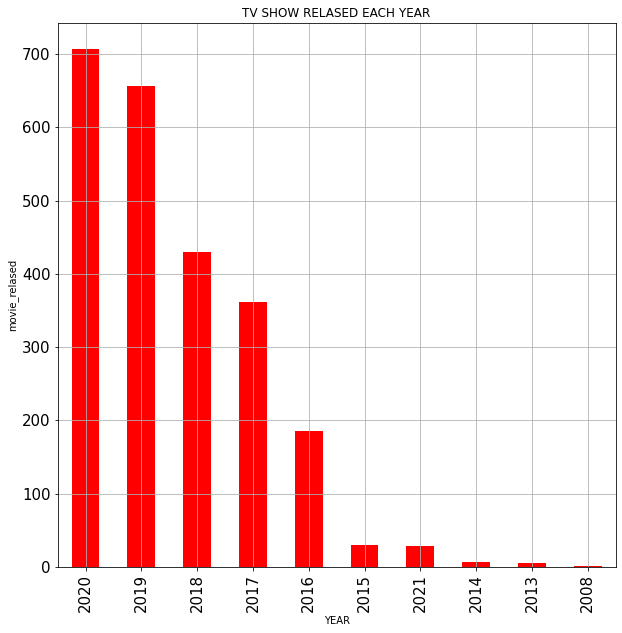

In [24]:
#relaseyear.plot(kind="bar");
relaseyear.plot(kind='bar', color='red',fontsize = 15,legend=False,figsize=(10,10))
plt.title("TV SHOW RELASED EACH YEAR");
plt.xlabel('YEAR');
plt.ylabel('movie_relased');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)

In [25]:
c=a.groupby('Relase_year')[['Category']].count()#count of movie
c

,Category
Relase_year,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,25
2015,88
2016,443


## Count of Movie by year

In [26]:
a=data[['Category','Relase_year']]
a
a[a['Category']=='Movie']

,Category,Relase_year
1,Movie,2016
2,Movie,2018
3,Movie,2017
4,Movie,2020
6,Movie,2020
...,...,...
7783,Movie,2020
7784,Movie,2020
7785,Movie,2019
7786,Movie,2020


In [27]:
a=data[['Category','Relase_year']]
c=a[a['Category']=='Movie']
c

,Category,Relase_year
1,Movie,2016
2,Movie,2018
3,Movie,2017
4,Movie,2020
6,Movie,2020
...,...,...
7783,Movie,2020
7784,Movie,2020
7785,Movie,2019
7786,Movie,2020


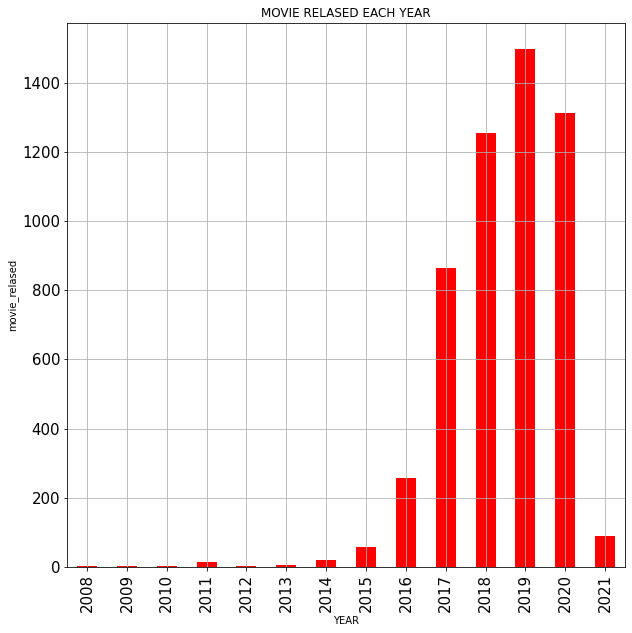

In [28]:
e=c.groupby('Relase_year')[['Category']].count()
e.plot(kind='bar',color='red',fontsize = 15,legend=False,figsize=(10,10))
plt.title("MOVIE RELASED EACH YEAR");
plt.xlabel('YEAR');
plt.ylabel('movie_relased');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

## Count of Movie by Relase_Month

In [29]:
a=data[['Category','Relase_month']]
c=a[a['Category']=='Movie']
c

,Category,Relase_month
1,Movie,December
2,Movie,December
3,Movie,November
4,Movie,January
6,Movie,June
...,...,...
7783,Movie,January
7784,Movie,October
7785,Movie,March
7786,Movie,September


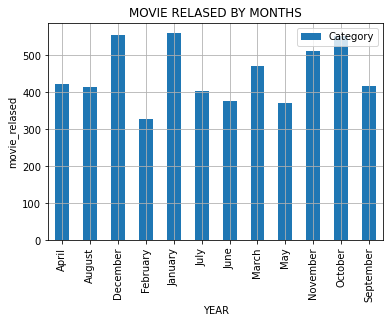

In [30]:
d=c.groupby('Relase_month')[['Category']].count()#count of movie by month.
d.plot(kind='bar')
plt.title("MOVIE RELASED BY MONTHS");
plt.xlabel('YEAR');
plt.ylabel('movie_relased');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

## Count of Tv Show by Relase_Month

In [31]:
a=data[['Category','Relase_month']]
c=a[a['Category']=='TV Show']
c

,Category,Relase_month
0,TV Show,August
5,TV Show,July
11,TV Show,November
12,TV Show,May
16,TV Show,March
...,...,...
7769,TV Show,December
7777,TV Show,August
7779,TV Show,July
7781,TV Show,November


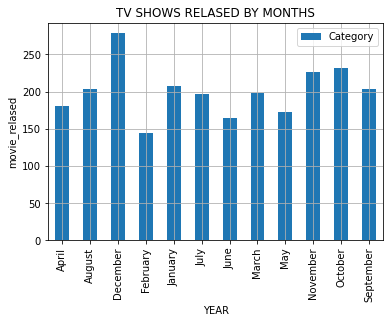

In [32]:
d=c.groupby('Relase_month')[['Category']].count()#count of movie by month.
d.plot(kind='bar')
plt.title("TV SHOWS RELASED BY MONTHS");
plt.xlabel('YEAR');
plt.ylabel('movie_relased');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

In [33]:
data.head(2)

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December


In [34]:
a=data[['Category','Relase_year','Relase_month']]
overallmovie=a[a['Category']=='Movie']
overallmovie

,Category,Relase_year,Relase_month
1,Movie,2016,December
2,Movie,2018,December
3,Movie,2017,November
4,Movie,2020,January
6,Movie,2020,June
...,...,...,...
7783,Movie,2020,January
7784,Movie,2020,October
7785,Movie,2019,March
7786,Movie,2020,September


# QUESTION ASK 3. Trend of movie and TV show relase by month and year

## No of Movie relased by year

In [35]:
year=overallmovie['Relase_year'].unique()
year

array([2016, 2018, 2017, 2020, 2019, 2021, 2015, 2013, 2011, 2012, 2014,
       2009, 2010, 2008])

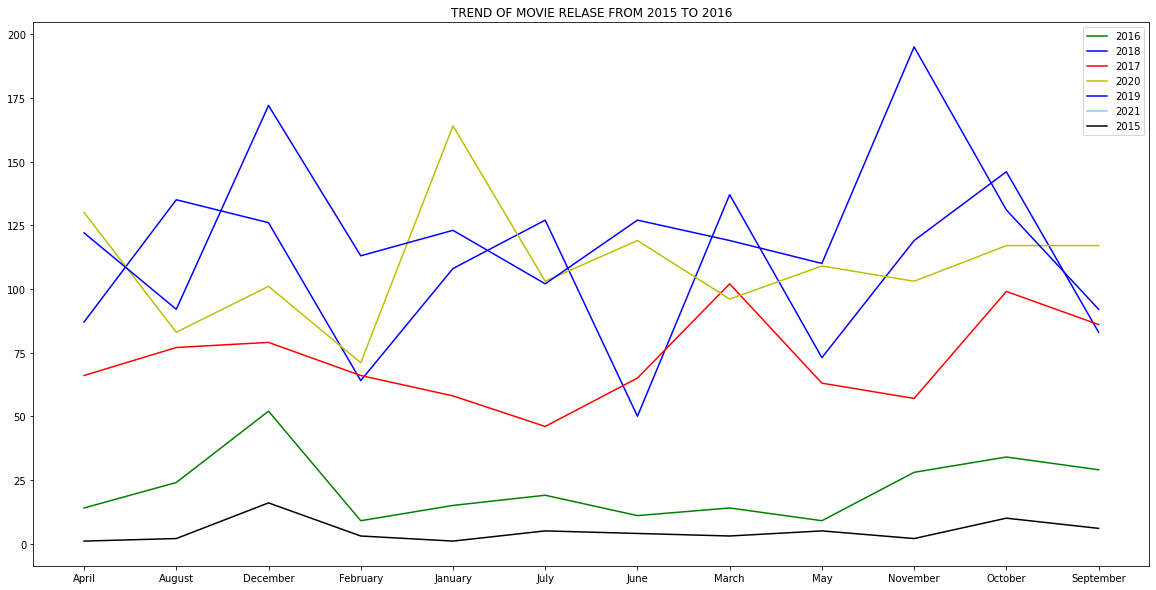

In [36]:
pltarea=[]# movie printing overall.
for i in year:
    a=overallmovie[overallmovie.Relase_year==i]
    yearplt=a.groupby('Relase_month')[['Category']].count()
    pltarea.append(yearplt)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.title('TREND OF MOVIE RELASE FROM 2015 TO 2016')
plt.plot(pltarea[0],'g',label='2008');
plt.plot(pltarea[1],'b',label='2008');
plt.plot(pltarea[2],'r',label='2008');

plt.plot(pltarea[3],'y',label='2008');
plt.plot(pltarea[4],'b',label='2008');
plt.plot(pltarea[5],'skyblue',label='2008');
plt.plot(pltarea[6],'black',label='2008');


plt.legend(['2016',
 '2018',
 '2017',
 '2020',
 '2019',
 '2021',
 '2015',
 '2013',
 '2011',
 '2012',
 '2014',
 '2009',
 '2010',
 '2008'], loc ="upper right")
plt.plot();

In [37]:
a=data[['Category','Relase_year','Relase_month']]
overalltvshow=a[a['Category']=='TV Show']
overalltvshow

,Category,Relase_year,Relase_month
0,TV Show,2020,August
5,TV Show,2017,July
11,TV Show,2018,November
12,TV Show,2019,May
16,TV Show,2019,March
...,...,...,...
7769,TV Show,2016,December
7777,TV Show,2020,August
7779,TV Show,2019,July
7781,TV Show,2019,November


In [38]:
year=overalltvshow['Relase_year'].unique()
year

array([2020, 2017, 2018, 2019, 2016, 2015, 2021, 2013, 2008, 2014])

## No of Tv-show  relased on platform by year

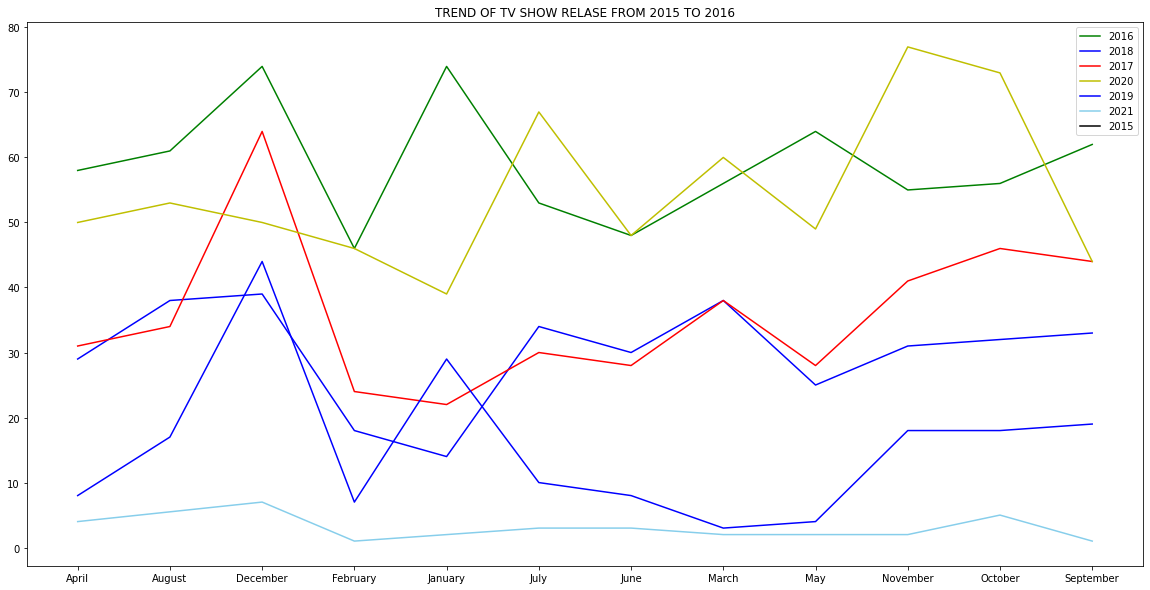

In [39]:
pltarea=[]# movie printing overall.
for i in year:
    a=overalltvshow[overalltvshow.Relase_year==i]
    yearplt=a.groupby('Relase_month')[['Category']].count()
    pltarea.append(yearplt)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.title('TREND OF TV SHOW RELASE FROM 2015 TO 2016')
plt.plot(pltarea[0],'g',label='2008');
plt.plot(pltarea[1],'b',label='2008');
plt.plot(pltarea[2],'r',label='2008');

plt.plot(pltarea[3],'y',label='2008');
plt.plot(pltarea[4],'b',label='2008');
plt.plot(pltarea[5],'skyblue',label='2008');
plt.plot(pltarea[6],'black',label='2008');



plt.legend(['2016',
 '2018',
 '2017',
 '2020',
 '2019',
 '2021',
 '2015',
 '2013',
 '2011',
 '2012',
 '2014',
 '2009',
 '2010',
 '2008'], loc ="upper right")
plt.plot();

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushraj21042002/netflixdataanlysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ayushraj21042002/netflixdataanlysis


'https://jovian.com/ayushraj21042002/netflixdataanlysis'

In [41]:
data.head(2)

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December


# 3.Analysis by Rating column

In [42]:
data['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

Here in rating section there are 14 unique value.

In [43]:
a=data[['Rating','Category']]
overallmovierating=a[a['Category']=='Movie']
Rating=overallmovierating.groupby('Rating')[['Category']].count()
Rating

,Category
Rating,
G,39
NC-17,3
NR,79
PG,247
PG-13,386
R,663
TV-14,1272
TV-G,111
TV-MA,1852


## Question4. Count of Movie and TV Show by rating 

## MOVIE COUNT BY RATING

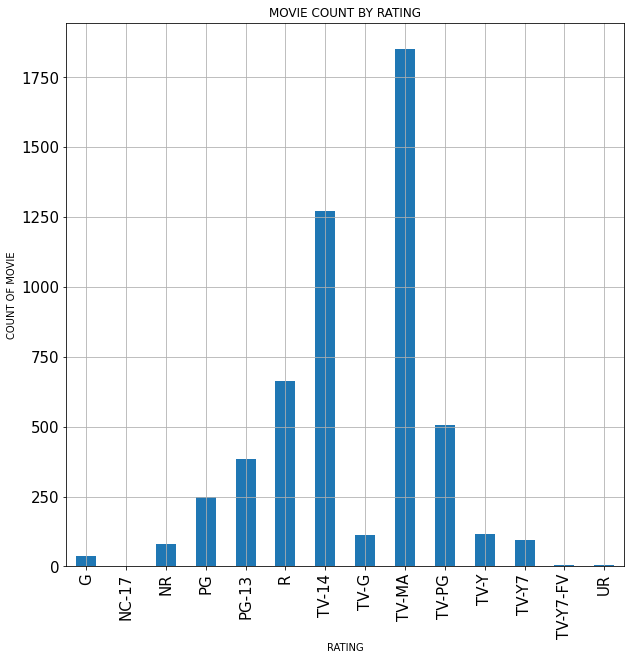

In [44]:
Rating.plot(kind='bar',fontsize = 15,legend=False,figsize=(10,10))
plt.title("MOVIE COUNT BY RATING");
plt.xlabel('RATING');
plt.ylabel('COUNT OF MOVIE');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

In [45]:
a=data[['Rating','Category']]
overallmovierating=a[a['Category']=='TV Show']
Rating=overallmovierating.groupby('Rating')[['Category']].count()
Rating

,Category
Rating,
NR,5
R,2
TV-14,659
TV-G,83
TV-MA,1020
TV-PG,301
TV-Y,163
TV-Y7,176
TV-Y7-FV,1


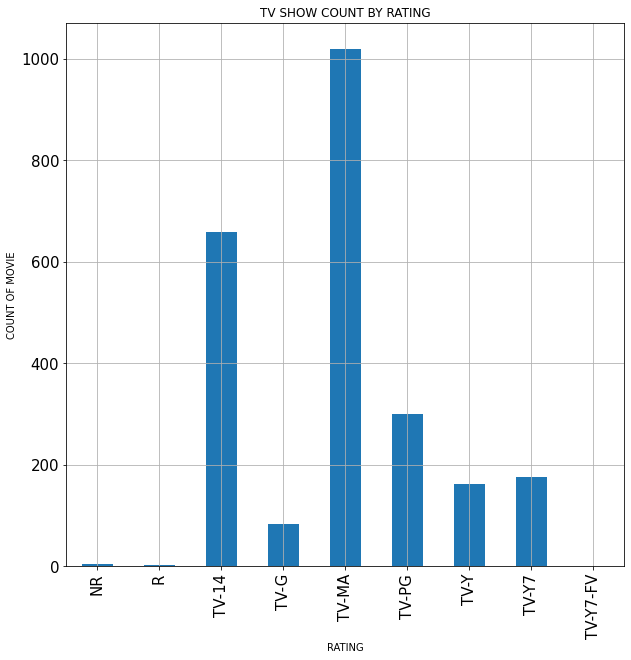

In [46]:
Rating.plot(kind='bar',fontsize = 15,legend=False,figsize=(10,10))
plt.title("TV SHOW COUNT BY RATING");
plt.xlabel('RATING');
plt.ylabel('COUNT OF MOVIE');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

In [47]:
data.head(2) # spliting of duration column in numerical and categorical vlaue
             #ex(4 seasons into 4 and seasons)(93 min into 93 and min).

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December


In [48]:
a = data.assign(row_number=range(len(a)))
a

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month,row_number
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,0
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,7784
7785,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,7785
7786,s7785,Movie,Zulu Man in Japan,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,7786
7787,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,7787


In [49]:
Duration=a['Duration'].str.split(" ", expand = True)
Duration = Duration.assign(row_number=range(len(Duration)))
Duration=Duration.rename(columns={0:"duration",1:'season/min'})
Duration

,duration,season/min,row_number
0,4,Seasons,0
1,93,min,1
2,78,min,2
3,80,min,3
4,123,min,4
...,...,...,...
7784,99,min,7784
7785,111,min,7785
7786,44,min,7786
7787,1,Season,7787


In [50]:
data_with_duration_season=a.merge(Duration,left_on='row_number', right_on='row_number')
a=data_with_duration_season.drop(['row_number','Duration'], axis=1)
a.head(2)
#data['Release_Date'] = pd.to_datetime(data['Release_Date'])

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Type,Description,Relase_year,Relase_month,duration,season/min
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,4,Seasons
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,93,min


In [51]:
a['duration'] = pd.to_numeric(a['duration'])

# 4.Analysis using Duration column.

# Question 5. Top 10 movie and Tv Show by duration

## Top 10 movie with duration

In [52]:
b=a[a['Category']=='Movie'].nlargest(10,['duration'])
b

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Type,Description,Relase_year,Relase_month,duration,season/min
957,s958,Movie,Black Mirror: Bandersnatch,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,TV-MA,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",2018,December,312,min
6852,s6851,Movie,The School of Mischief,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,2020-05-21,TV-14,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,2020,May,253,min
4490,s4491,Movie,No Longer kids,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,2020-05-21,TV-14,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,2020,May,237,min
3694,s3695,Movie,Lock Your Girls In,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,2020-05-21,TV-PG,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,2020,May,233,min
5109,s5109,Movie,Raya and Sakina,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",NaN,2020-05-21,TV-14,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...,2020,May,230,min
5377,s5377,Movie,Sangam,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,2019-12-31,TV-14,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,2019,December,228,min
3521,s3522,Movie,Lagaan,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,2021-01-10,PG,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",2021,January,224,min
3195,s3196,Movie,Jodhaa Akbar,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,2018-10-01,TV-14,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate...",2018,October,214,min
3282,s3283,Movie,Kabhi Khushi Kabhie Gham,"Amitabh Bachchan, Jaya Bhaduri, Shah Rukh Khan...",India,2020-04-01,TV-14,"Dramas, International Movies",Years after his father disowns his adopted bro...,2020,April,209,min
6509,s6508,Movie,The Irishman,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,2019-11-27,R,Dramas,Hit man Frank Sheeran looks back at the secret...,2019,November,209,min


# 6. Distribution Movie duration and TV Show Seasons

## Distribution of duration of movie

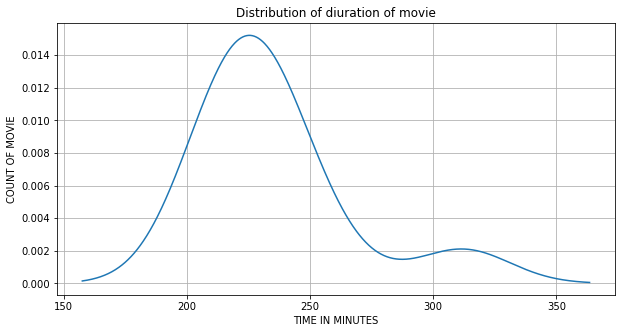

In [53]:
#df['points'].plot(kind='kde')
b['duration'].plot(kind='kde',figsize=(10,5))
plt.title("Distribution of diuration of movie");
plt.xlabel('TIME IN MINUTES');
plt.ylabel('COUNT OF MOVIE');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

## Top 10 TV SHOW WITH SEASONS

In [54]:
b=a[a['Category']=='TV Show'].nlargest(10,['duration'])
b

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Type,Description,Relase_year,Relase_month,duration,season/min
2538,s2539,TV Show,Grey's Anatomy,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2020-05-09,TV-14,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2020,May,16,Seasons
4438,s4439,TV Show,NCIS,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,TV-14,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,2018,July,15,Seasons
5913,s5913,TV Show,Supernatural,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,TV-14,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",2020,June,15,Seasons
1471,s1472,TV Show,COMEDIANS of the world,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,TV-MA,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...,2019,January,13,Seasons
5138,s5138,TV Show,Red vs. Blue,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,2020-01-01,NR,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",2020,January,13,Seasons
1537,s1538,TV Show,Criminal Minds,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada",2017-06-30,TV-14,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...,2017,June,12,Seasons
7171,s7170,TV Show,Trailer Park Boys,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,2018-03-30,TV-MA,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...,2018,March,12,Seasons
1300,s1301,TV Show,Cheers,"Ted Danson, Rhea Perlman, George Wendt, John R...",United States,2017-07-01,TV-PG,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o...",2017,July,11,Seasons
2263,s2264,TV Show,Frasier,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,2020-01-01,TV-PG,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,2020,January,11,Seasons
2678,s2679,TV Show,Heartland,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2019-08-01,TV-14,TV Dramas,Spunky teenager Amy is reeling from the sudden...,2019,August,11,Seasons


## DISTRIBUTION OF SEASONS IN TV SHOW

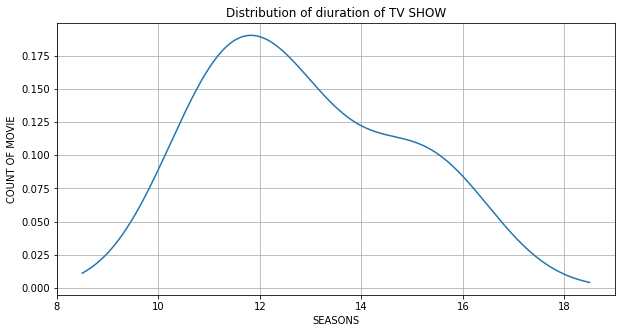

In [55]:
b['duration'].plot(kind='kde',figsize=(10,5))
plt.title("Distribution of diuration of TV SHOW");
plt.xlabel('SEASONS');
plt.ylabel('COUNT OF MOVIE');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

In [56]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ayushraj21042002/netflixdataanlysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/ayushraj21042002/netflixdataanlysis


'https://jovian.com/ayushraj21042002/netflixdataanlysis'

In [57]:
data.head(2)

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December


there are 682 country in which movie and tvshow are relased

# 5.Analysing Using Type column

In [58]:
res = data.set_index(['Show_Id','Category','Title','Cast','Country','Release_Date','Rating','Duration','Description','Relase_year','Relase_month']).apply(lambda x: x.str.split(',').explode()).reset_index()
len(res['Type'].unique())

73

## There are 73 type of Tv show and Movie

In [59]:
b=res[['Category','Type']]
b=b[b['Category']=='Movie']
b


,Category,Type
3,Movie,Dramas
4,Movie,International Movies
5,Movie,Horror Movies
6,Movie,International Movies
7,Movie,Action & Adventure
...,...,...
17070,Movie,Documentaries
17071,Movie,International Movies
17072,Movie,Music & Musicals
17075,Movie,Documentaries


# Quesion 7. Count of Movie and TV Shows types of Movie and Tv Show

## Count of Movie  in Type

In [60]:
type=b.groupby('Type')[['Category']].count()
type

,Category
Type,
Anime Features,38
Children & Family Movies,30
Classic Movies,26
Comedies,397
Cult Movies,47
Documentaries,35
Dramas,723
Faith & Spirituality,57
Horror Movies,68


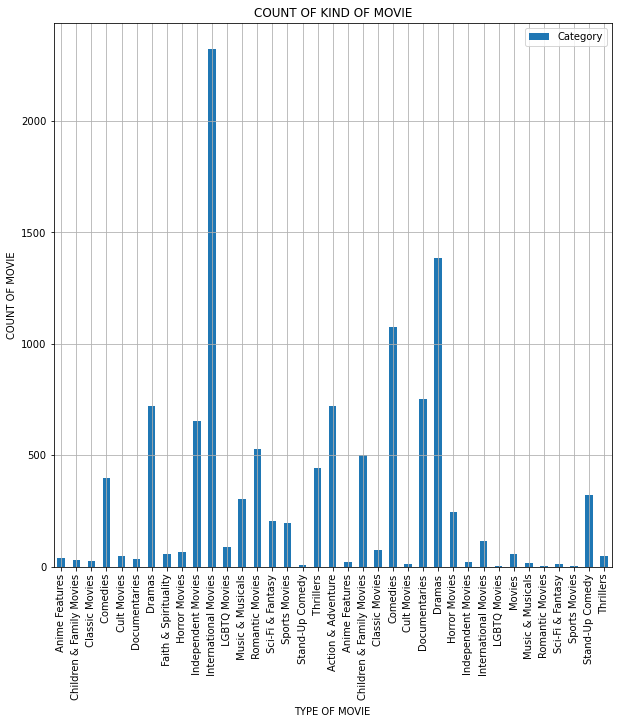

In [61]:
type.plot(kind="bar",figsize=(10,10))
plt.title("COUNT OF KIND OF MOVIE");
plt.xlabel('TYPE OF MOVIE');
plt.ylabel('COUNT OF MOVIE');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

## Count of Tv show in each Category

In [62]:
b=res[['Category','Type']]
b=b[b['Category']=='TV Show']
b
type=b.groupby('Type')[['Category']].count()
type

,Category
Type,
Classic & Cult TV,6
Crime TV Shows,58
Docuseries,159
International TV Shows,509
Kids' TV,55
Korean TV Shows,150
Reality TV,120
Romantic TV Shows,305
Science & Nature TV,85


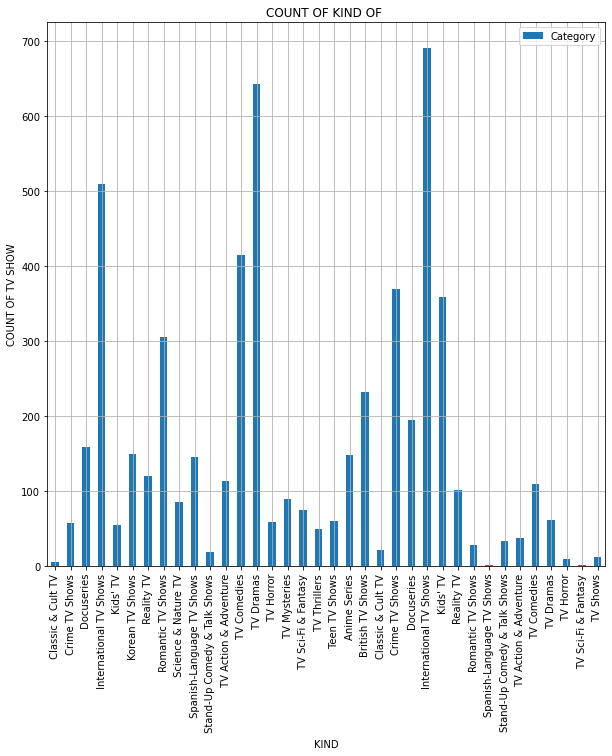

In [63]:
type.plot(kind="bar",figsize=(10,10))
plt.title("COUNT OF KIND OF ");
plt.xlabel('KIND');
plt.ylabel('COUNT OF TV SHOW');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

# 6.Analysis with country column

In [64]:

res = res.set_index(['Show_Id','Category','Title','Cast','Release_Date','Rating','Duration','Description','Relase_year','Relase_month','Type']).apply(lambda x: x.str.split(',').explode()).reset_index()
len(res['Country'].unique())

189

THERE ARE 189 COUNTRY IN WHICH MOVIE AND TV SHOW ARE CASTED.

# Question 8. Show the count Movie and TV Shows relased in country

## Count of Category by Country

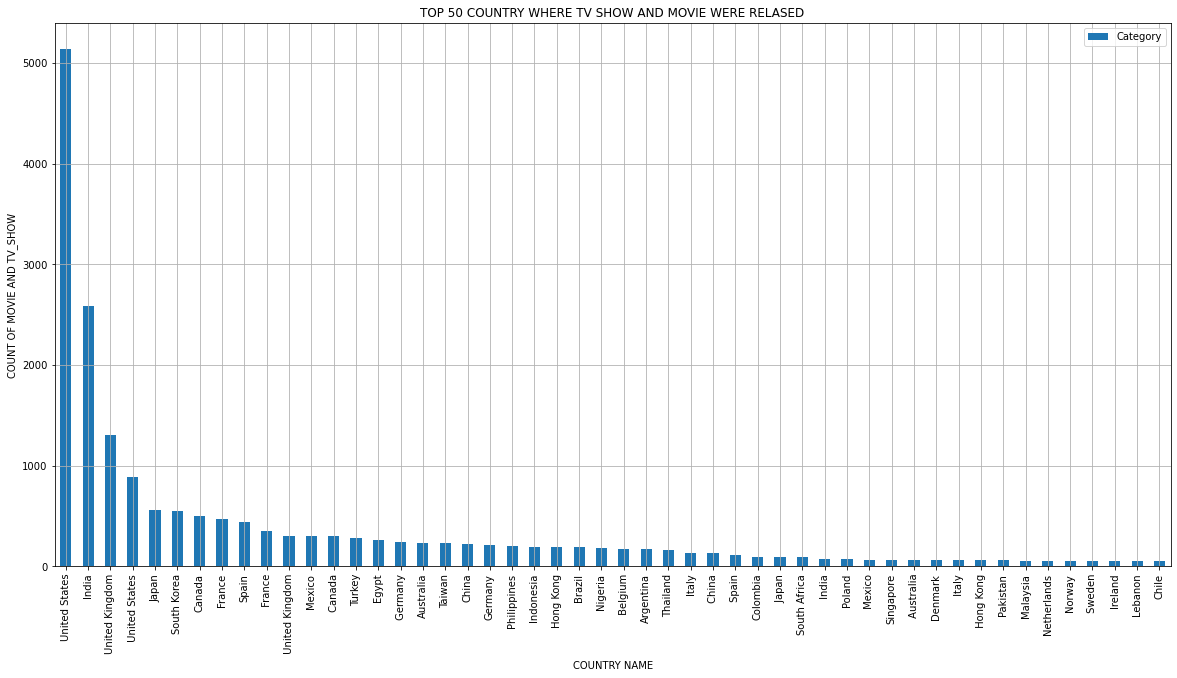

In [65]:
b=res[['Country','Category']]
type=b.groupby('Country')[['Category']].count()
top_50_Country=type.nlargest(50,['Category'])
top_50_Country.plot(kind='bar',figsize=(20,10));
plt.title("TOP 50 COUNTRY WHERE TV SHOW AND MOVIE WERE RELASED");
plt.xlabel('COUNTRY NAME');
plt.ylabel('COUNT OF MOVIE AND TV_SHOW');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

## Count of TV Show by country

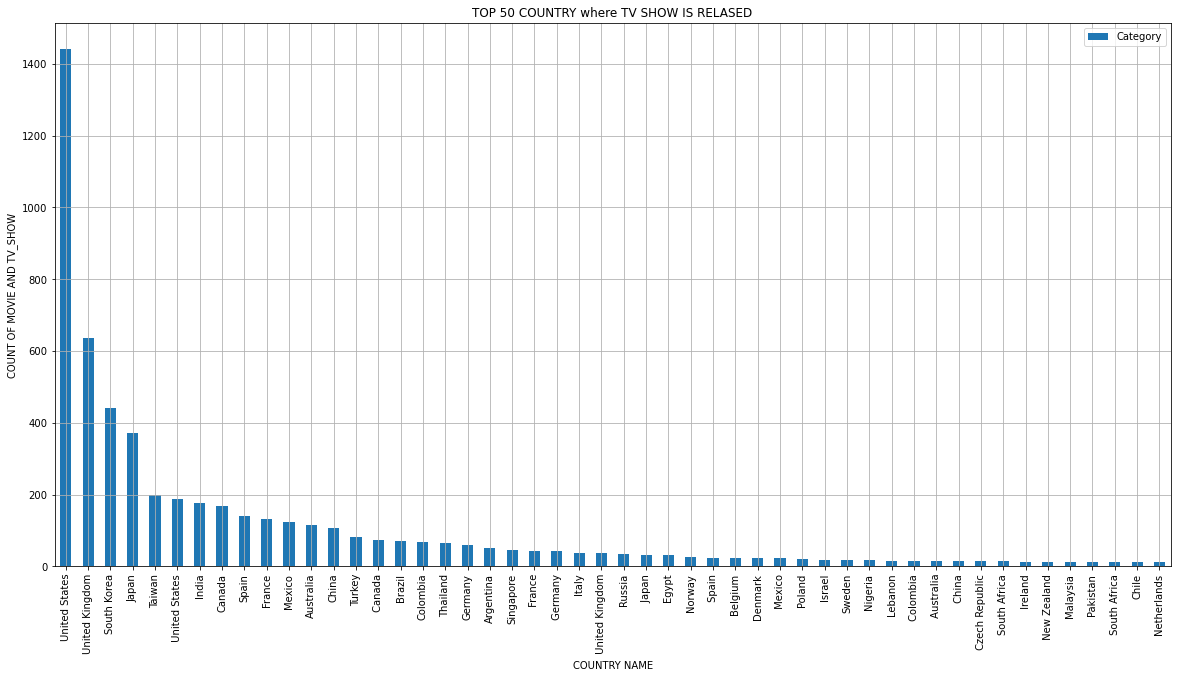

In [66]:
b=res[['Category','Country']]
b=b[b['Category']=='TV Show']
b
type=b.groupby('Country')[['Category']].count()
top_50_Country_with_tvshow=type.nlargest(50,['Category'])
top_50_Country_with_tvshow.plot(kind='bar',figsize=(20,10));
plt.title("TOP 50 COUNTRY where TV SHOW IS RELASED");
plt.xlabel('COUNTRY NAME');
plt.ylabel('COUNT OF MOVIE AND TV_SHOW');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

## Count of Movie by Country

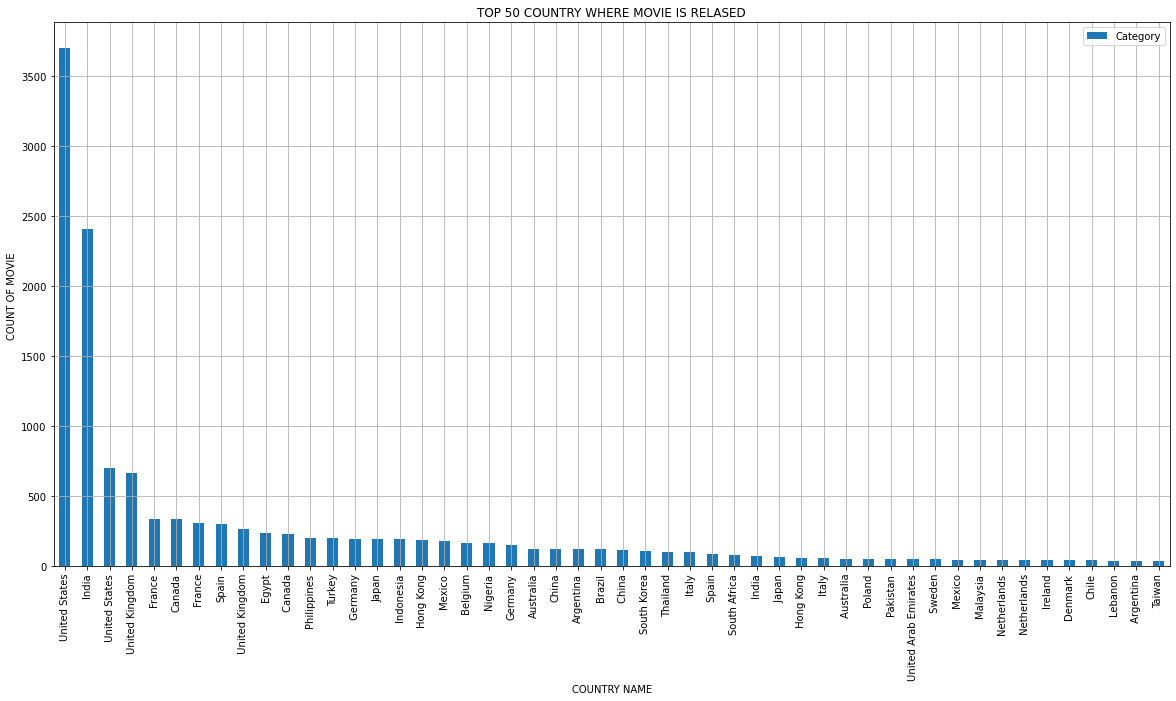

In [67]:
b=res[['Category','Country']]
b=b[b['Category']=='Movie']
b
type=b.groupby('Country')[['Category']].count()
top_50_Country_with_movie=type.nlargest(50,['Category'])
top_50_Country_with_movie.plot(kind='bar',figsize=(20,10));
plt.title("TOP 50 COUNTRY WHERE MOVIE IS RELASED");
plt.xlabel('COUNTRY NAME');
plt.ylabel('COUNT OF MOVIE ');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

In [68]:
res

,Show_Id,Category,Title,Cast,Release_Date,Rating,Duration,Description,Relase_year,Relase_month,Type,Country
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,2020,August,International TV Shows,Brazil
1,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,2020,August,TV Dramas,Brazil
2,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",2020-08-14,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,2020,August,TV Sci-Fi & Fantasy,Brazil
3,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...,2016,December,Dramas,Mexico
4,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",2016-12-23,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...,2016,December,International Movies,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
20950,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,NaN,2020-03-01,TV-MA,90 min,This documentary delves into the mystique behi...,2020,March,Documentaries,Canada
20951,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,NaN,2020-03-01,TV-MA,90 min,This documentary delves into the mystique behi...,2020,March,Documentaries,United States
20952,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,NaN,2020-03-01,TV-MA,90 min,This documentary delves into the mystique behi...,2020,March,Music & Musicals,United Kingdom
20953,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,NaN,2020-03-01,TV-MA,90 min,This documentary delves into the mystique behi...,2020,March,Music & Musicals,Canada


In [69]:
b=res[['Category','Rating','Country']]
b=b[b['Category']=='Movie']
b
b['count']=1
b

,Category,Rating,Country,count
3,Movie,TV-MA,Mexico,1
4,Movie,TV-MA,Mexico,1
5,Movie,R,Singapore,1
6,Movie,R,Singapore,1
7,Movie,PG-13,United States,1
...,...,...,...,...
20950,Movie,TV-MA,Canada,1
20951,Movie,TV-MA,United States,1
20952,Movie,TV-MA,United Kingdom,1
20953,Movie,TV-MA,Canada,1


# Question 9. Show the count rating of Movie and TV shows by country

## COUNT OF EACH RATING BY EACH COUNTRY

In [70]:
table=pd.pivot_table(b, values='count', index=['Country'],
                    columns=['Rating'], aggfunc=np.sum)
table=table.fillna(0)

display(table)

Rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
Country,,,,,,,,,,,,,,
,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,5.0,0.0,0.0,0.0,0.0
Venezuela,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vietnam,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January
...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October
7785,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March
7786,s7785,Movie,Zulu Man in Japan,Nasty C,NaN,2020-09-25,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September
7787,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October


In [72]:
res = data.set_index(['Show_Id','Category','Title','Country','Release_Date','Rating','Duration','Type','Description','Relase_year','Relase_month']).apply(lambda x: x.str.split(',').explode()).reset_index()
res.head(5)

,Show_Id,Category,Title,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month,Cast
0,s1,TV Show,3%,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,João Miguel
1,s1,TV Show,3%,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Bianca Comparato
2,s1,TV Show,3%,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Michel Gomes
3,s1,TV Show,3%,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Rodolfo Valente
4,s1,TV Show,3%,Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Vaneza Oliveira


## Analysis using Cast column

In [73]:
len(res['Cast'].unique())

35373

# Question 10. Show the top 50 actor which has casted in movie and TV show 

##  Count of Category by cast

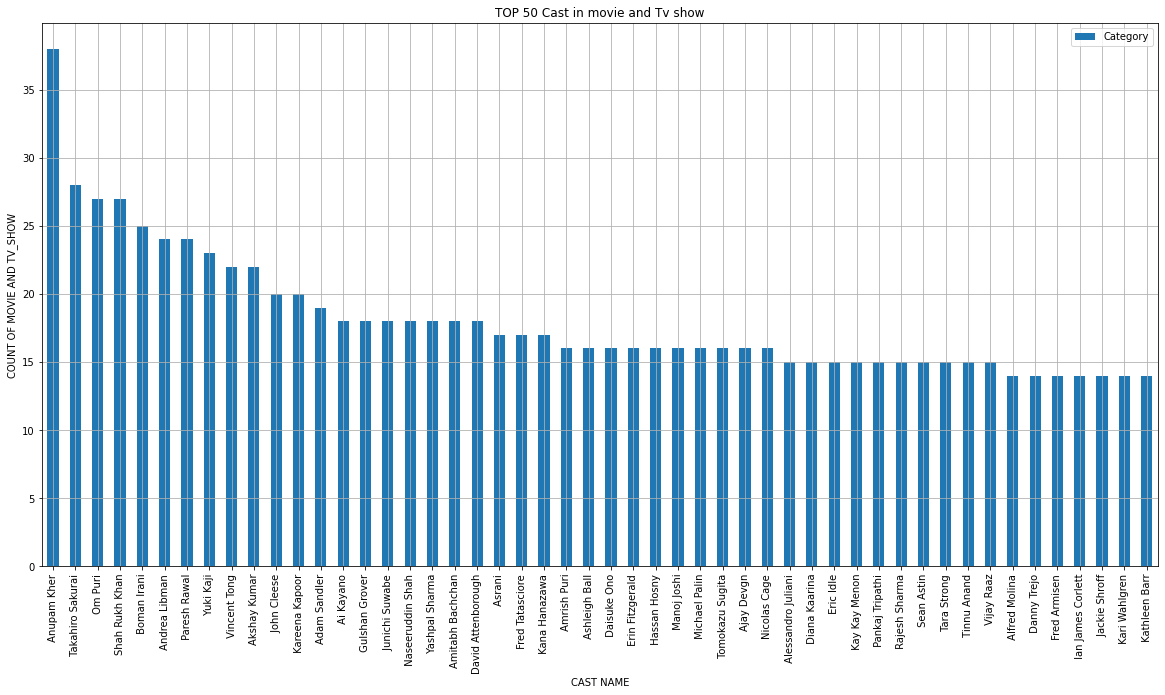

In [74]:
b=res[['Cast','Category']]
type=b.groupby('Cast')[['Category']].count()
top_50_Country=type.nlargest(50,['Category'])
top_50_Country.plot(kind='bar',figsize=(20,10));
plt.title("TOP 50 Cast in movie and Tv show");
plt.xlabel('CAST NAME');
plt.ylabel('COUNT OF MOVIE AND TV_SHOW');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()

## Count of Movie by Cast

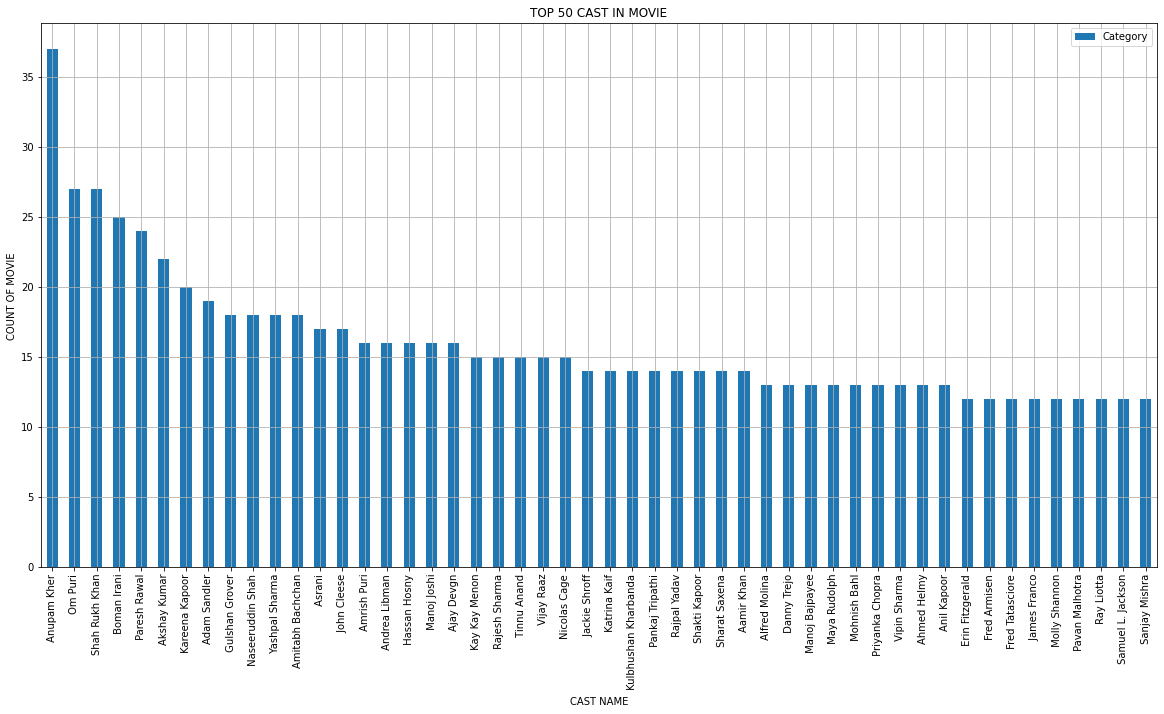

In [75]:
b=res[['Cast','Category']]
b=b[b['Category']=='Movie']
b
type=b.groupby('Cast')[['Category']].count()
top_50_Country_with_movie=type.nlargest(50,['Category'])
top_50_Country_with_movie.plot(kind='bar',figsize=(20,10));
plt.title("TOP 50 CAST IN MOVIE");
plt.xlabel('CAST NAME');
plt.ylabel('COUNT OF MOVIE ');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()


## Count of TV Show by Cast

/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


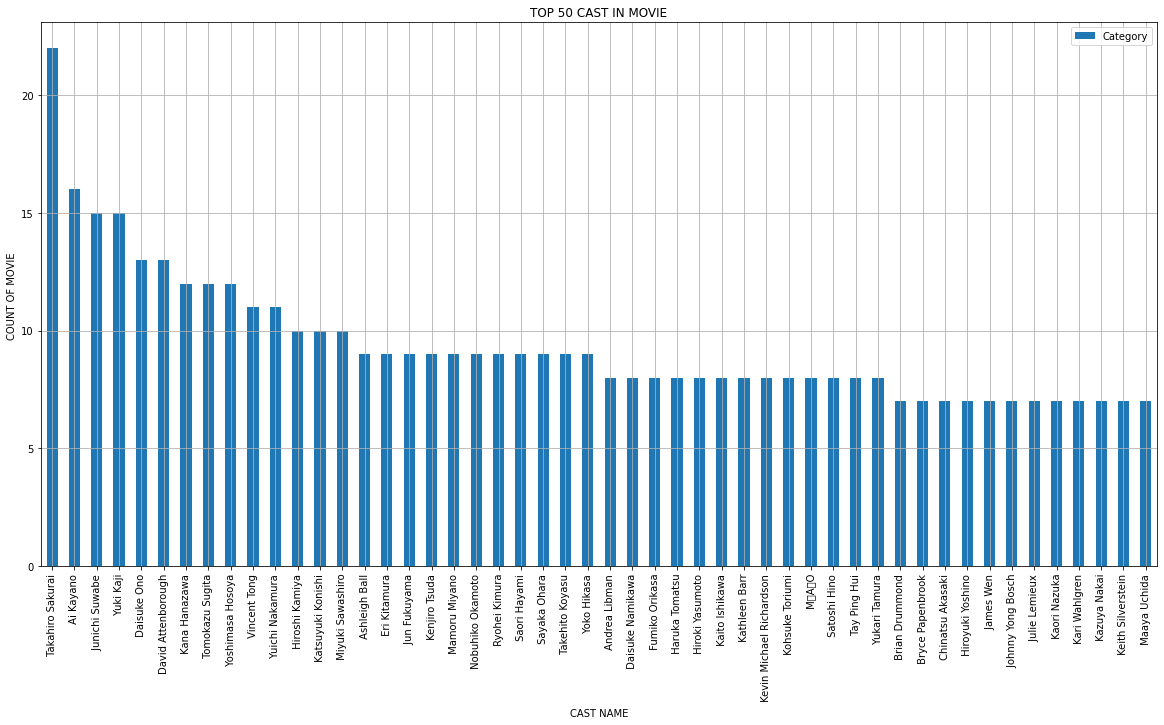

In [76]:
b=res[['Cast','Category']]
b=b[b['Category']=='TV Show']
b
type=b.groupby('Cast')[['Category']].count()
top_50_Country_with_movie=type.nlargest(50,['Category'])
top_50_Country_with_movie.plot(kind='bar',figsize=(20,10));
plt.title("TOP 50 CAST IN MOVIE");
plt.xlabel('CAST NAME');
plt.ylabel('COUNT OF MOVIE ');
plt.horizontalalignment='center';
plt.weight='bold'
plt.grid(True)
plt.show()


In [77]:
data.head(2)

,Show_Id,Category,Title,Cast,Country,Release_Date,Rating,Duration,Type,Description,Relase_year,Relase_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,07:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December


# Conclusion 
1.There is about 68 percent of movie and 32 percent is TV shows on Netfilix according to this data

2. Relasing of TV show is positive trend and for movie it is in negative trend year by year.

3. In November,December, January no of movie relase is highest.

4. In Octuber, November and December no of highest no of TV Show relased.

5. Movie and TV Show has get max no time TV-MG Rating.

6. Distribution of movie time is right skewed. Max no of movie has duration of 190 to 270

7. Distribution of TV shows time is little bit right skewed. Max no of TV shows has seasions 10 to 17

8. There is maximum Internation movie and minimum sport Movie on netflix

9. There is maximum on  Internation TV movie and minimum spanish language TV Show on netflix

10. Anupam Kher has cased in maximum no of movie. he has casted in 37 Movie which is on netfix

11. Takhairo Shakruai has cased in maximum no of TV Shows.